In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import Diagonal

n_qubits = 3          
N = 2**n_qubits
L = 1.0              
D = 1.0              
t = 1.0               
x = 1.0               

phi = x * D * t * (2 * np.pi / L)**2

j = np.arange(N) #from 0 to N-1

k_squared = np.where(j < N/2, j**2, (j - N)**2)

unitary_diag = np.exp(-1j * phi * k_squared)

qc = QuantumCircuit(n_qubits)

evolution_gate = Diagonal(unitary_diag)

qc.append(evolution_gate, range(n_qubits))

print("Diagonal Operator Entries:")
print(np.round(unitary_diag, 3))

print("\nCircuit Diagram:")
print(qc)

Diagonal Operator Entries:
[ 1.   +0.j    -0.207-0.978j  0.672-0.741j -0.954+0.301j -0.981+0.193j
 -0.954+0.301j  0.672-0.741j -0.207-0.978j]

Circuit Diagram:
     ┌───────────┐
q_0: ┤0          ├
     │           │
q_1: ┤1 Diagonal ├
     │           │
q_2: ┤2          ├
     └───────────┘


/tmp/ipykernel_84006/2677257778.py:22: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  evolution_gate = Diagonal(unitary_diag)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import Diagonal
from qiskit.quantum_info import Statevector

# --- 1. SETUP PARAMETERS ---
n_qubits = 3
N = 2**n_qubits
L = 1.0

# Define the Hamiltonian (k^2) diagonal
j_indices = np.arange(N)
k_squared = np.where(j_indices < N/2, j_indices**2, (j_indices - N)**2)
Hamiltonian_diag = (2 * np.pi / L)**2 * k_squared

# --- 2. LCHS PARAMETERS ---
# NOTE: 0.5 * (exp(ix) + exp(-ix)) = cos(x). 
# This specific setup creates a Cosine of the operator, not a pure exponential decay.
# To get pure decay, you would need Gaussian coefficients (Hubbard-Stratonovich).
coeffs = [0.5, 0.5]      
times  = [0.1, -0.1]     

# --- 3. BUILD THE CIRCUIT ---
reg_a = QuantumRegister(1, 'ancilla') 
reg_s = QuantumRegister(n_qubits, 'system')
qc = QuantumCircuit(reg_a, reg_s)

# A) PREPARE (Ancilla Superposition)
qc.h(reg_a[0]) 

# B) SELECT (Controlled-Hamiltonian Simulation)
# We use list(reg_s) to ensure we target the system qubits correctly

# -- Construct U0 (triggered on 0) --
U0_diag = np.exp(-1j * Hamiltonian_diag * times[0])
gate_U0 = Diagonal(U0_diag).control(1, ctrl_state=0) 
qc.append(gate_U0, [reg_a[0]] + list(reg_s))  # <--- FIXED HERE

# -- Construct U1 (triggered on 1) --
U1_diag = np.exp(-1j * Hamiltonian_diag * times[1])
gate_U1 = Diagonal(U1_diag).control(1, ctrl_state=1) 
qc.append(gate_U1, [reg_a[0]] + list(reg_s))  # <--- FIXED HERE

# C) UN-PREPARE
qc.h(reg_a[0])

print("LCU Circuit Constructed Successfully.")
qc.draw() # Uncomment to see the diagram

LCU Circuit Constructed Successfully.


/tmp/ipykernel_84006/3968421268.py:37: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  gate_U0 = Diagonal(U0_diag).control(1, ctrl_state=0)
/tmp/ipykernel_84006/3968421268.py:42: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  gate_U1 = Diagonal(U1_diag).control(1, ctrl_state=1)


┌───┐┌─────────────┐┌─────────────┐┌───┐
 ancilla: ┤ H ├┤0            ├┤0            ├┤ H ├
          └───┘│             ││             │└───┘
system_0: ─────┤1            ├┤1            ├─────
               │  c_Diagonal ││  c_Diagonal │     
system_1: ─────┤2            ├┤2            ├─────
               │             ││             │     
system_2: ─────┤3            ├┤3            ├─────
               └─────────────┘└─────────────┘

In [15]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import QFTGate, StatePreparation
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

n_qubits=3


qcQFT = QFTGate(n_qubits)
qcIQFT = QFTGate(n_qubits).inverse()


x = np.linspace(0,2**n_qubits-1,2**n_qubits)
print(x)
state = np.zeros(2**n_qubits)
state[3] = 1
state = state/np.linalg.norm(state,2)

stateprep = StatePreparation(state)
circuit = QuantumCircuit(n_qubits+1)
circuit.compose(stateprep, qubits=range(1,n_qubits+1), inplace=True)
circuit.append(qcQFT, range(1,n_qubits+1))

circuit.compose(qc,inplace=True)
circuit.append(qcIQFT, range(1,n_qubits+1))
circuit.draw()

final_state = Statevector.from_instruction(circuit)


[0. 1. 2. 3. 4. 5. 6. 7.]


Using 4 terms (Requires 2 ancilla qubits)
Times: [-0. -0.  0.  0.]
Coeffs: [0.5 0.5 0.5 0.5]


/tmp/ipykernel_84006/2383850050.py:57: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  gate = Diagonal(U_diag).control(n_ancilla, ctrl_state=ctrl_str)
/tmp/ipykernel_84006/2383850050.py:57: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  gate = Diagonal(U_diag).control(n_ancilla, ctrl_state=ctrl_str)
/tmp/ipykernel_84006/2383850050.py:57: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  gate = Diagonal(U_diag).control(n_ancilla, ctrl_state=ctrl_str)
/tmp/ipykernel_84006/2383850050.py:57: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`

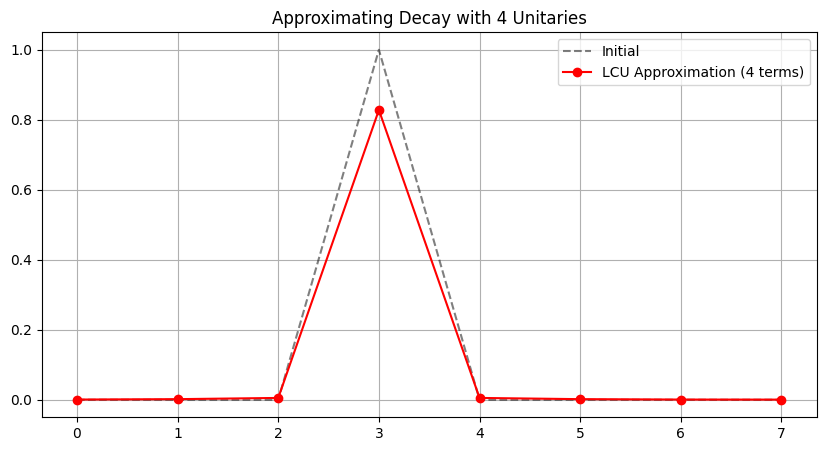

Success Probability (Norm of outcome): 0.8438-0.0000j


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import Diagonal, QFTGate, StatePreparation
from qiskit.quantum_info import Statevector

# --- 1. SETUP PARAMETERS ---
n_qubits = 3
N = 2**n_qubits
L = 1.0

# Define the Hamiltonian H = k^2
j_indices = np.arange(N)
k_squared = np.where(j_indices < N/2, j_indices**2, (j_indices - N)**2)
Hamiltonian_diag = (2 * np.pi / L)**2 * k_squared

# --- 2. GENERATE LCU COEFFICIENTS (Lorentzian Distribution) ---
# We use 4 terms to approximate the integral
num_terms = 4
n_ancilla = int(np.ceil(np.log2(num_terms))) # Needs 2 qubits for 4 terms

# Pick 4 time points for the simulation (e.g., -0.5, -0.1, 0.1, 0.5)
# A tighter spread near zero approximates decay better for short times
times = np.linspace(-0.002, 0.002, num_terms)

# Calculate weights based on the Fourier transform of decay: 1/(1+t^2)
weights = 1 / (1 + times**2)
weights = weights / np.sum(weights) # Normalize so probabilities sum to 1
coeffs = np.sqrt(weights)           # Amplitudes are sqrt(probability)

print(f"Using {num_terms} terms (Requires {n_ancilla} ancilla qubits)")
print(f"Times: {np.round(times, 2)}")
print(f"Coeffs: {np.round(coeffs, 2)}")

# --- 3. BUILD THE LCU CIRCUIT ---
reg_a = QuantumRegister(n_ancilla, 'ancilla') 
reg_s = QuantumRegister(n_qubits, 'system')
lc_qc = QuantumCircuit(reg_a, reg_s)

# A) PREPARE: Load the coefficients into the Ancilla
# We use Qiskit's StatePreparation to create the superposition sum(c_j |j>)
prep_gate = StatePreparation(coeffs)
lc_qc.append(prep_gate, reg_a)

# B) SELECT: Apply Controlled-Unitaries
# We loop through each term index (00, 01, 10, 11)
for i in range(num_terms):
    # 1. Define the diagonal unitary for this time step: exp(-i * H * t_i)
    U_diag = np.exp(-1j * Hamiltonian_diag * times[i])
    
    # 2. Create a Controlled Gate
    # We control on the binary representation of 'i' (e.g. i=0 -> "00", i=1 -> "01")
    ctrl_str = format(i, f'0{n_ancilla}b')[::-1] # Reverse because Qiskit is Little-Endian
    
    # Create the gate and control it
    # Note: Diagonal gates are efficient to simulate
    gate = Diagonal(U_diag).control(n_ancilla, ctrl_state=ctrl_str)
    
    lc_qc.append(gate, list(reg_a) + list(reg_s))

# C) UN-PREPARE: Inverse of step A
lc_qc.append(prep_gate.inverse(), reg_a)

# --- 4. MAIN SIMULATION (With QFT) ---
circuit = QuantumCircuit(n_ancilla + n_qubits)

# Initialize System (Delta peak at index 3)
state = np.zeros(N); state[3] = 1
stateprep = StatePreparation(state / np.linalg.norm(state))
circuit.append(stateprep, range(n_ancilla, n_ancilla + n_qubits)) # Apply to System

# QFT
circuit.append(QFTGate(n_qubits), range(n_ancilla, n_ancilla + n_qubits))

# Apply LCU Operator
circuit.compose(lc_qc, inplace=True)

# Inverse QFT
circuit.append(QFTGate(n_qubits).inverse(), range(n_ancilla, n_ancilla + n_qubits))

# --- 5. PLOT RESULTS ---
final_state = Statevector.from_instruction(circuit)
full_data = np.array(final_state)

# Slice: We need the system state when Ancilla is |00> (Index 0)
# Since we have 2 ancilla qubits, the "stride" is 2^2 = 4.
# (Indices 0, 4, 8, 12... correspond to Ancilla=00)
system_state = full_data[0::2**n_ancilla]
final = system_state
probs = system_state**2

plt.figure(figsize=(10, 5))
plt.plot(np.arange(N), state, 'k--', label='Initial', alpha=0.5)
plt.plot(np.arange(N), probs, 'ro-', label='LCU Approximation (4 terms)')
plt.title("Approximating Decay with 4 Unitaries")
plt.legend()
plt.grid(True)
plt.show()

print(f"Success Probability (Norm of outcome): {np.sum(probs):.4f}")